In [1]:
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
import re
import numpy as np
import seaborn as sns
import scipy.signal as sg
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.decomposition import SparsePCA
import pywt
from scipy import stats
import timeit
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import pandas as pd
from datetime import datetime
import pytz
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from skimage import io
from patchify import patchify, unpatchify
%matplotlib inline
from sklearn.calibration import CalibrationDisplay
import collections

import numpy as np

import scipy.signal as signal
import scipy.special as special
import scipy.optimize as optimize

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

import dtreeviz 
import pickle

In [2]:
def balance_dataset(X, y):
    # Separate the data into classes
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]

    # Sample an equal number of samples from each class
    num_samples_per_class = min(len(class_0_indices), len(class_1_indices))

    # Randomly sample indices for each class
    sampled_indices_class_0 = np.random.choice(class_0_indices, num_samples_per_class, replace=False)
    sampled_indices_class_1 = np.random.choice(class_1_indices, num_samples_per_class, replace=False)

    # Combine the sampled indices
    sampled_indices = np.concatenate([sampled_indices_class_0, sampled_indices_class_1])

    # Use the sampled indices to create the balanced training set
    X_balanced = X[sampled_indices]
    y_balanced = y[sampled_indices]
    
    # Check the balance in y_train_balanced
    print(np.bincount(y_balanced))

    return(X_balanced, y_balanced, sampled_indices)

In [2]:
# fog_aware_pivot = pd.read_csv('fog_aware_stats_4_equal_patches_pivot.csv')
fog_aware_pivot = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/STA_221_project_code/analyses_files/fog_aware_stats_horizontal_3_patches_pivot.csv')
# fog_aware_pivot = pd.read_csv('~/Documents/STA_221/fog_aware_stats_horizontal_3_patches_pivot.csv')
fog_aware_pivot



,photo,Label,site,hour,mscn_var_0,mscn_var_1,mscn_var_2,vertical_var_0,vertical_var_1,vertical_var_2,...,entropy_2,dark_channel_prior_0,dark_channel_prior_1,dark_channel_prior_2,color_sat_0,color_sat_1,color_sat_2,CF_0,CF_1,CF_2
0,2022_07-04.0000_agatebeachor.jpg,not_foggy,agatebeachor,0,0.220805,0.285012,0.099900,0.065638,0.106588,0.034401,...,2.732247,28.0,6.0,14.0,0.000000,0.000000,0.000000,85.593872,51.769043,10.103722
1,2022_07-04.0000_otterrockor.jpg,not_foggy,otterrockor,0,0.725298,0.720047,0.691137,0.493167,0.477681,0.461369,...,4.046315,2.0,4.0,0.0,0.244513,0.152914,0.160079,90.752732,158.670973,166.963307
2,2022_07-04.0700_agatebeachor.jpg,not_foggy,agatebeachor,7,0.096299,0.131353,0.173731,0.015461,0.041110,0.050096,...,3.970212,64.0,24.0,37.0,0.000000,0.000000,0.000000,35.000917,18.467704,9.174465
3,2022_07-04.0730_agatebeachor.jpg,not_foggy,agatebeachor,7,0.101561,0.205493,0.325304,0.016175,0.091502,0.142794,...,3.391335,95.0,13.0,20.0,0.063917,0.072188,0.164992,105.608782,106.996344,147.341268
4,2022_07-04.0730_otterrockor.jpg,not_foggy,otterrockor,7,0.251876,0.576411,0.588961,0.082378,0.292454,0.396829,...,3.734168,7.0,0.0,0.0,0.099916,0.042100,0.124894,110.066753,189.517876,183.865692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,2023_09-30.1900_agatebeachor.jpg,not_foggy,agatebeachor,19,0.176457,0.743293,0.523022,0.083535,0.457137,0.265502,...,4.049856,70.0,0.0,0.0,0.041942,0.085205,0.077075,182.964334,69.402653,135.332656
7992,2023_09-30.1930_cannonbeach.jpg,not_foggy,cannonbeach,19,0.164592,0.585149,0.640644,0.042335,0.314184,0.390172,...,4.220025,0.0,0.0,0.0,0.039959,0.058892,0.092489,137.364165,106.650678,174.568957
7993,2023_09-30.2000_otterrockor.jpg,not_foggy,otterrockor,20,0.282921,0.442290,0.345411,0.136875,0.235093,0.183542,...,4.125160,22.0,3.0,0.0,0.125098,0.145597,0.143351,176.593142,127.302494,142.248589
7994,2023_09-30.2030_otterrockor.jpg,not_foggy,otterrockor,20,0.193967,0.582705,0.378667,0.059283,0.307785,0.207709,...,3.946078,26.0,0.0,0.0,0.137039,0.243238,0.247271,175.215470,145.617058,152.212567


In [3]:
foggy = pd.DataFrame(os.listdir('/home/smmrrr/Fog_Imaging_Project/cnn_images_reboot/all_foggy/'), columns = ['photo'])
foggy['Label_new'] = 'foggy'
not_foggy = pd.DataFrame(os.listdir('/home/smmrrr/Fog_Imaging_Project/cnn_images_reboot/all_not_foggy/'), columns = ['photo'])
not_foggy['Label_new'] = 'not_foggy'

new_labels = pd.concat([foggy,not_foggy])

fog_aware_pivot = new_labels.merge(fog_aware_pivot, how = 'right')

In [4]:
print(fog_aware_pivot.loc[fog_aware_pivot['Label_new'].isna(), 'Label'].unique())
fog_aware_pivot.loc[fog_aware_pivot['Label_new'].isna(), 'Label_new'] = 'not_foggy'

['not_foggy']


In [5]:
fog_aware_pivot['Label_train'] = 1*(fog_aware_pivot['Label_new']=='foggy')


In [4]:
#####1/11/24 all fixed
# fog_aware_pivot.loc[fog_aware_pivot['photo'] == '2022_07-06.1530_pacificcityor.jpg', 'Label'] = 'not_foggy'
# ###THIS LABEL IS WRONG
# fog_aware_pivot.loc[fog_aware_pivot['photo'] == '2022_07-25.1900_pacificcityor.jpg', 'Label'] = 'not_foggy'
# fog_aware_pivot.loc[fog_aware_pivot['photo'] == '2022_07-09.0830_lincolncityor.jpg', 'Label'] = 'not_foggy'


In [6]:

fog_aware_pivot.loc[fog_aware_pivot['site'] == 'agatebeachor','site'] = 'Agate Beach'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'lincolncityor','site'] = 'Lincoln City'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'pacificcityor','site'] = 'Pacific City'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'beverlyor','site'] = 'Beverly'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'otterrockor','site'] = 'Otter Rock'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'cannonbeach','site'] = 'Cannon Beach'


In [7]:

X = np.array(fog_aware_pivot.drop(['photo', 'Label_new', 'Label', 'site', 'hour', 'Label_train'], axis = 1)
            )

y = fog_aware_pivot['Label_train']

In [8]:
####create a 50/50 dataset of foggy not foggy
# X_balanced, y_balanced, sample_i = balance_dataset(X, y)


###scale the data
X_scaled = preprocessing.StandardScaler().fit_transform(X)
print(X_scaled.shape)


X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(
        X_scaled, y, np.arange(len(X_scaled)), test_size=0.20
    # , random_state=42
    , stratify = y)


(7996, 27)


In [9]:
# balence = fog_aware_pivot.loc[sample_i].reset_index(drop=True)
test_balence= fog_aware_pivot.loc[i_test].reset_index(drop=True)


In [10]:
print(len(i_test), len(y_test))

1600 1600


In [11]:

####create summary stat datasets
summary_stats = pd.DataFrame(columns = ['model',
"Accuracy",
"Precision",
"Recall",
"F1 Score",
"AUC"
])

precision_recall = pd.DataFrame(columns = ['model','precision_array', 'recall_array' ])
roc = pd.DataFrame(columns = ['model','fpr', 'tpr'])
y_info = pd.DataFrame(columns = ['model','site','y_test','y_test_pred', 'y_scores'])
site = np.array(test_balence['site'])

In [13]:
##### logistic regression
model_name = 'Logistic Regression'
clf = LogisticRegression(random_state=0,solver = 'liblinear' )
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel())
print('Train accuracy: %.2f' % train_accuracy)

y_test_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:, 1]


# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_scores)

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

y_scores = clf.predict_proba(X_test)[:, 1]
# y_scores = gmm.predict(X_test)

# Calculate precision and recall for various thresholds
precision_array, recall_array, thresholds_pr = precision_recall_curve(y_test, y_scores)

fpr, tpr, thresholds_roc = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)



####gmm summary stats
summary_stats = pd.concat([summary_stats,
                               pd.DataFrame({'model':model_name,
                "Accuracy":[accuracy],
                "Precision":[precision],
                "Recall":[recall],
                "F1 Score":[f1],
                "AUC":[roc_auc]
                                            })
            ], axis = 0)

#### precision recall 
precision_recall = pd.concat([precision_recall
,pd.DataFrame({'model':model_name,'precision_array':precision_array
               , 'recall_array':recall_array,'thresholds':np.hstack([0,thresholds_pr]) })
],axis=0)
###roc chart
roc = pd.concat([roc
,pd.DataFrame({'model':model_name,'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds_roc})
],axis=0)
##prediction info
y_info = pd.concat([y_info
,pd.DataFrame({'model':model_name,'site':site
               ,'y_test':y_test,'y_test_pred':y_test_pred, 'y_scores':y_scores})
],axis=0)


Train accuracy: 0.97
Accuracy: 0.964375
Precision: 0.9010989010989011
Recall: 0.8078817733990148
F1 Score: 0.851948051948052
AUC-ROC Score: 0.9882048443004186


In [14]:
filename = 'logistic_model.sav'
pickle.dump(clf, open(filename, 'wb'))


In [15]:
model_name = 'Random Forest'

clf = RandomForestClassifier(n_estimators=5, max_depth=10, max_features='sqrt', random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = clf.predict(X_test)


# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

y_scores = clf.predict_proba(X_test)[:, 1]
# y_scores = gmm.predict(X_test)

# Calculate precision and recall for various thresholds
precision_array, recall_array, thresholds_pr = precision_recall_curve(y_test, y_scores)

fpr, tpr, thresholds_roc = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)



####gmm summary stats
summary_stats = pd.concat([summary_stats,
                               pd.DataFrame({'model':model_name,
                "Accuracy":[accuracy],
                "Precision":[precision],
                "Recall":[recall],
                "F1 Score":[f1],
                "AUC":[roc_auc]
                                            })
            ], axis = 0)

#### precision recall 
precision_recall = pd.concat([precision_recall
,pd.DataFrame({'model':model_name,'precision_array':precision_array
               , 'recall_array':recall_array,'thresholds':np.hstack([0,thresholds_pr]) })
],axis=0)
###roc chart
roc = pd.concat([roc
,pd.DataFrame({'model':model_name,'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds_roc})
],axis=0)
##prediction info
y_info = pd.concat([y_info
,pd.DataFrame({'model':model_name,'site':site
               ,'y_test':y_test,'y_test_pred':y_test_pred, 'y_scores':y_scores})
],axis=0)


Accuracy: 0.961875
Precision: 0.927710843373494
Recall: 0.7586206896551724
F1 Score: 0.8346883468834688
AUC-ROC Score: 0.9670617191659819


In [16]:
filename = 'random_forest_model.sav'
pickle.dump(clf, open(filename, 'wb'))


In [15]:
model_name = 'Shallow Decision Tree'

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

y_scores = clf.predict_proba(X_test)[:, 1]
# y_scores = gmm.predict(X_test)

# Calculate precision and recall for various thresholds
precision_array, recall_array, thresholds_pr = precision_recall_curve(y_test, y_scores)

fpr, tpr, thresholds_roc = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)



####gmm summary stats
summary_stats = pd.concat([summary_stats,
                               pd.DataFrame({'model':model_name,
                "Accuracy":[accuracy],
                "Precision":[precision],
                "Recall":[recall],
                "F1 Score":[f1],
                "AUC":[roc_auc]
                                            })
            ], axis = 0)

#### precision recall 
precision_recall = pd.concat([precision_recall
,pd.DataFrame({'model':model_name,'precision_array':precision_array
               , 'recall_array':recall_array,'thresholds':np.hstack([0,thresholds_pr]) })
],axis=0)
###roc chart
roc = pd.concat([roc
,pd.DataFrame({'model':model_name,'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds_roc})
],axis=0)
##prediction info
y_info = pd.concat([y_info
,pd.DataFrame({'model':model_name,'site':site
               ,'y_test':y_test,'y_test_pred':y_test_pred, 'y_scores':y_scores})
],axis=0)


Accuracy: 0.949375
Precision: 0.9178082191780822
Recall: 0.6600985221674877
F1 Score: 0.7679083094555874
AUC-ROC Score: 0.9376514064268613


In [16]:
model_name = 'Gaussian Mixture'
clf = GaussianMixture(n_components=2
                    # ,covariance_type='full' ##this covariance type works best
                      # , max_iter=20, random_state=0
                     )
clf.fit(X_train)


# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
while accuracy < 0.45:  ###in case the model gets the 1s and 0s mixed up
    clf = GaussianMixture(n_components=2
                        # ,covariance_type='diag' ##this covariance type works best
                         )
    clf.fit(X_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    print(accuracy)



precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

y_scores = clf.predict_proba(X_test)[:, 1]
# y_scores = gmm.predict(X_test)

# Calculate precision and recall for various thresholds
precision_array, recall_array, thresholds_pr = precision_recall_curve(y_test, y_scores)

fpr, tpr, thresholds_roc = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)



####gmm summary stats
summary_stats = pd.concat([summary_stats,
                               pd.DataFrame({'model':model_name,
                "Accuracy":[accuracy],
                "Precision":[precision],
                "Recall":[recall],
                "F1 Score":[f1],
                "AUC":[roc_auc]
                                            })
            ], axis = 0)

#### precision recall 
precision_recall = pd.concat([precision_recall
,pd.DataFrame({'model':model_name,'precision_array':precision_array
               , 'recall_array':recall_array,'thresholds':np.hstack([0,thresholds_pr]) })
],axis=0)
###roc chart
roc = pd.concat([roc
,pd.DataFrame({'model':model_name,'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds_roc})
],axis=0)
##prediction info
y_info = pd.concat([y_info
,pd.DataFrame({'model':model_name,'site':site
               ,'y_test':y_test,'y_test_pred':y_test_pred, 'y_scores':y_scores})
],axis=0)


Accuracy: 0.66875
Precision: 0.2763337893296854
Recall: 0.9950738916256158
F1 Score: 0.4325481798715204
AUC-ROC Score: 0.9423253911442888


In [152]:
summary_stats

,model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.928125,0.857143,0.775385,0.814216,0.961923
0,Random Forest,0.918750,0.849462,0.729231,0.784768,0.950261
0,Shallow Decision Tree,0.895625,0.772414,0.689231,0.728455,0.901104
0,Gaussian Mixture,0.719375,0.414601,0.926154,0.572788,0.882687


In [17]:
precision_recall = precision_recall.reset_index()
roc = roc.reset_index()

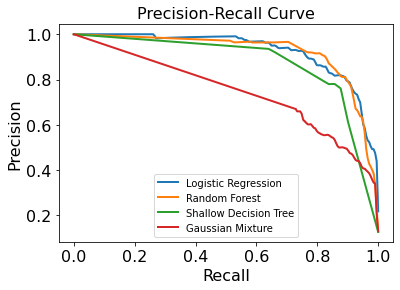

In [18]:
sns.lineplot(x='recall_array', y='precision_array', hue='model', linewidth = 2
             , data =precision_recall )
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.tick_params(axis='both', which='both', labelsize=16)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(prop={'size': 10 }, loc = 'lower center')
plt.show()

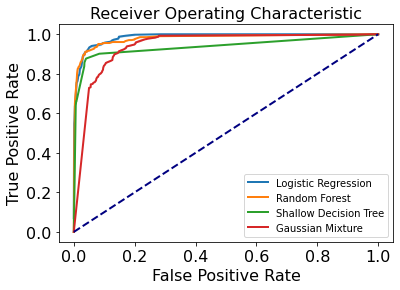

In [19]:
plt.figure()
sns.lineplot(x='fpr', y='tpr', hue='model', linewidth = 2
             # ,palette = 'Dark2'
             , data =roc)
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=16)

plt.legend(loc="lower right")
plt.show()

In [20]:
y_info.loc[y_info['y_test']==1,'Label'] = 'Foggy'
y_info.loc[y_info['y_test']==0,'Label'] = 'Not Foggy'


NameError: name 'model' is not defined

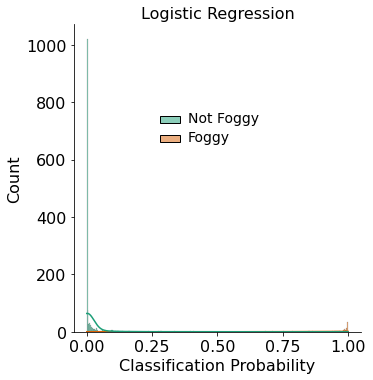

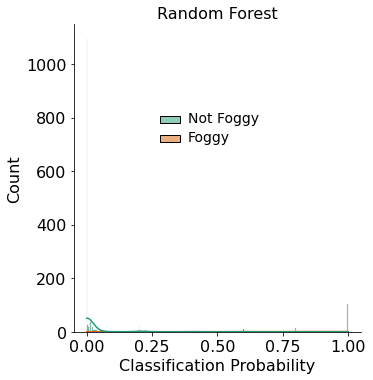

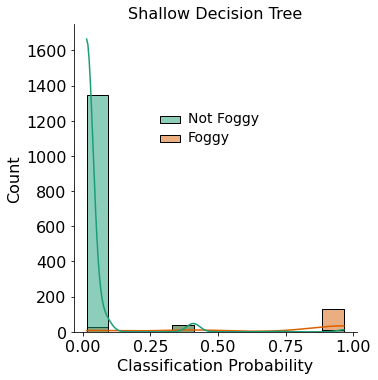

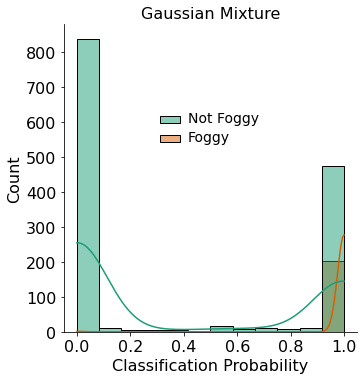

In [21]:
for model in y_info.model.unique():
    df = y_info.loc[y_info['model']==model, ['y_scores','Label']]
    g =sns.displot(data=df, x='y_scores', hue='Label', kde=True, palette='Dark2')
    legend = g._legend
    plt.xlabel('Classification Probability', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title(model, fontsize=16)
    plt.tick_params(axis='both', which='both', labelsize=16)
    # Set the font size for the legend items
    legend.set_bbox_to_anchor((.6, .7))  # Adjust the legend position
    legend.set_title("")  # Set the legend title and adjust its font size
    for item in legend.get_texts():
        item.set_fontsize(14)  # Adjust the font size as needed



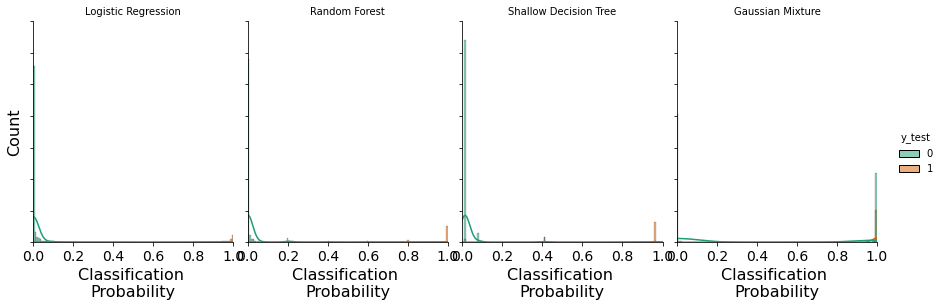

In [22]:
df = y_info[['y_scores','y_test', 'model']]

g = sns.displot(data=df, x='y_scores', hue='y_test', kde=True
                , palette='Dark2', col='model'
               , height=4, aspect=.8)

# Set axis labels and title for each subplot
g.set_axis_labels('Classification \nProbability', 'Count', fontsize=16)
g.set_titles('{col_name}', fontsize=20, fontdict={'verticalalignment': 'baseline'})
g.set(xlim=(0, 1))
# Adjust tick parameters
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)


In [23]:
y_info['accuracy'] = 1*(y_info['y_test'] == y_info['y_test_pred'])

plot_site_accuracy = y_info.groupby(['model', 'site']
                                   )['accuracy'].mean().reset_index()
# plot_site_accuracy

In [24]:
plot_site_precision = y_info.loc[y_info['y_test'] == 1].groupby(['model', 'site']
                                   )['accuracy'].mean().reset_index()

In [25]:
plot_site_recall = y_info.loc[y_info['y_test_pred'] == 1].groupby(['model', 'site']
                                   )['accuracy'].mean().reset_index()

In [96]:
# plot_site_accuracy

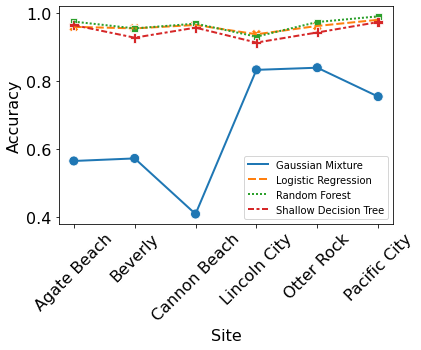

In [26]:
scat = sns.scatterplot(y='accuracy', x='site'
                , hue = 'model', style='model'
                ,s = 100
                       ,legend=False
                , data=plot_site_accuracy)

line = sns.lineplot(y='accuracy', x='site'
                , hue = 'model', style='model'
                , lw =2
                , data=plot_site_accuracy)
legend = scat.get_legend()
legend.set_title("")
# plt.ylim(0.6, 1)  # Adjust the limits as needed
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.xlabel('Site', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=16)


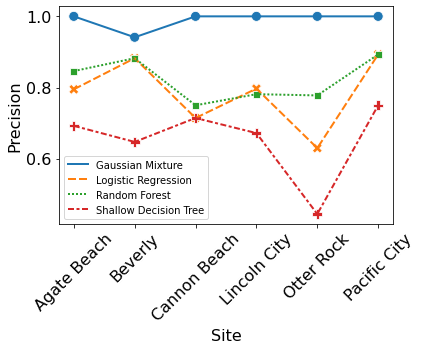

In [27]:
scat = sns.scatterplot(y='accuracy', x='site'
                , hue = 'model', style='model'
                ,s = 100
                       ,legend=False
                , data=plot_site_precision)

line = sns.lineplot(y='accuracy', x='site'
                , hue = 'model', style='model'
                , lw =2
                , data=plot_site_precision)
legend = scat.get_legend()
legend.set_title("")
# plt.ylim(0.6, 1)  # Adjust the limits as needed

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.xlabel('Site', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=16)


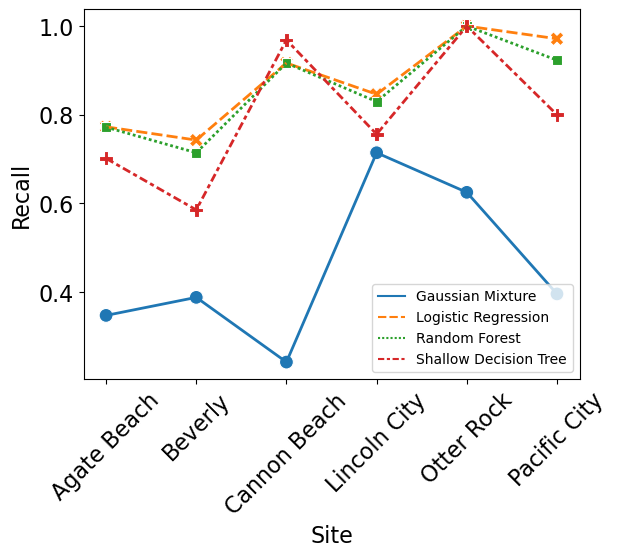

In [164]:
scat = sns.scatterplot(y='accuracy', x='site'
                , hue = 'model', style='model'
                ,s = 100
                       ,legend=False
                , data=plot_site_recall)

line = sns.lineplot(y='accuracy', x='site'
                , hue = 'model', style='model'
                , lw =2
                , data=plot_site_recall)
legend = scat.get_legend()
legend.set_title("")

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.xlabel('Site', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.tick_params(axis='both', which='both', labelsize=16)


In [61]:
# Create classifiers
lr = LogisticRegression()
rf =  RandomForestClassifier(n_estimators=5, max_depth=5, max_features='sqrt', random_state=42)
dt =  tree.DecisionTreeClassifier(max_depth=3)
gmm = GaussianMixture(n_components=2
                    # ,covariance_type='full' ##this covariance type works best
                      # , max_iter=20, random_state=0
                     )


clf_list = [
    (lr, "Logistic Regression"),
    (rf, "Random Forest"),
    (dt, "Shallow Decision Tree"),
    (gmm, "Gaussian Mixture"),
]



/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/sklearn/calibration.py:1140: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/sklearn/calibration.py:1140: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/sklearn/calibration.py:1140: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.


ValueError: 'estimator' should be a fitted classifier.

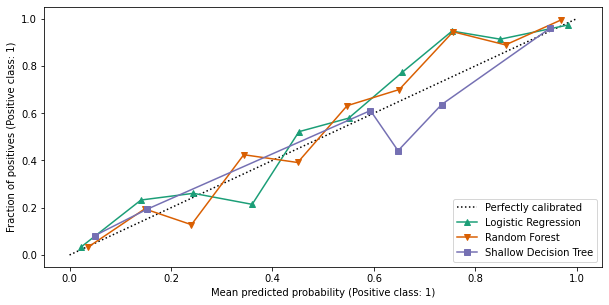

In [69]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 10))
colors = plt.get_cmap("Dark2")
gs = GridSpec(4, 2)
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    if i == 3:
        clf.fit(X_train)
    else:
        clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")


In [81]:
y_info

,model,y_test,y_test_pred,y_scores
5264,Logistic Regression,0,1,5.284205e-01
2294,Logistic Regression,1,1,9.983388e-01
6320,Logistic Regression,0,0,1.304624e-01
1602,Logistic Regression,1,1,9.999579e-01
4452,Logistic Regression,0,0,2.188430e-03
...,...,...,...,...
3037,Gaussian Mixture,1,1,1.000000e+00
4465,Gaussian Mixture,0,0,9.568186e-94
4409,Gaussian Mixture,0,0,3.256857e-53
4550,Gaussian Mixture,0,1,1.820018e-161
